# 6 State Model Net Cycle Flux Testing

In [1]:
import os
import sys
import numpy as np
import networkx as nx
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sympy import *
import time
from sympy.parsing.sympy_parser import parse_expr

from kda import plotting, graph_utils, calculations, diagrams, expressions, ode

In [2]:
kvals1 = np.array(
    [
        [0, 1, 0, 0, 0, 1],
        [1, 0, 1, 0, 0, 0],
        [0, 1, 0, 1, 0, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 0, 1, 0, 1],
        [1, 0, 0, 0, 1, 0],
    ]
)
kvals2 = np.array(
    [
        [0, 1, 0, 1, 0, 1],
        [1, 0, 1, 0, 0, 0],
        [0, 1, 0, 1, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 1, 0, 1],
        [1, 0, 0, 0, 1, 0],
    ]
)

G1 = nx.MultiDiGraph()
graph_utils.generate_edges(G1, kvals1)
G2 = nx.MultiDiGraph()
graph_utils.generate_edges(G2, kvals2)

pos = {}
offset = (np.pi / 2)
for i in range(6):
    theta = offset - i * (np.pi / 3)
    pos[i] = [np.cos(theta), np.sin(theta)]

cwd = os.getcwd()

In [3]:
plotting.draw_diagrams(G1, pos=pos, font_size=12, path=cwd, label="6_state_diagram", curved_arrows=True)
plotting.draw_diagrams(G2, pos=pos, font_size=12, path=cwd, label="6_state_leakage_diagram", curved_arrows=True)

In [4]:
sol = ode.ode_solver(np.array([1/3, 1/3, 1/3, 0, 0, 0]), kvals1, t_max=8)
plotting.draw_ode_results(sol, path=cwd, label="6_state_ode_solution")

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


In [5]:
pars = diagrams.generate_partial_diagrams(G2)
plotting.draw_diagrams(pars, pos=pos, panel=True, panel_scale=1.75, rows=1, font_size=12, path=cwd, label="6wl_partial_diagrams")

dirpars = diagrams.generate_directional_diagrams(G2)
plotting.draw_diagrams(dirpars, pos=pos, panel=True, panel_scale=1.75, rows=6, font_size=12, cbt=True, path=cwd, label="6wl_directional_diagrams")

In [6]:
G1_cycle = graph_utils.find_all_unique_cycles(G1)[0]
G2_cycles = graph_utils.find_all_unique_cycles(G2)

# pick positive direction
G1_order = [1, 0]
G2_orders = [[0, 5], [1, 0], [1, 0]]

In [7]:
G2_cycles_reordered = [G2_cycles[1], G2_cycles[0], G2_cycles[2]]

In [8]:
plotting.draw_cycles(G2, G2_cycles_reordered, pos=pos, panel=True, panel_scale=1.75, font_size=12, path=cwd, label="6wl_cycles", curved_arrows=True, cbt=True)

In [9]:
rate_names1 = ["A_on, A_off, B_on, B_off, k_conf, A_in, A_out, c_B"]
A_on, A_off, B_on, B_off, k_conf, A_in, A_out, c_B = symbols('A_on A_off B_on B_off k_conf A_in A_out c_B')
k12, k21, k23, k32, k34, k43, k45, k54, k56, k65, k61, k16 = symbols("k12 k21 k23 k32 k34 k43 k45 k54 k56 k65 k61 k16")
sub_dict1 = {k12 : A_on*A_out,
            k21 : A_off,
            k23 : k_conf,
            k32 : k_conf,
            k34 : A_off,
            k43 : A_on*A_in,
            k45 : B_on*c_B,
            k54 : B_off,
            k56 : k_conf,
            k65 : k_conf,
            k61 : B_off,
            k16 : B_on*c_B}

A_on = 1e10
A_off = 1e3
B_on = 1e9
B_off = 1e2
A_in = 10**(-6.5)
A_out = 10**(-7.5)
c_B = 10**(-8)

rate_names1s = ["k_conf"]
k_conf = symbols('k_conf')
k12, k21, k23, k32, k34, k43, k45, k54, k56, k65, k61, k16 = symbols("k12 k21 k23 k32 k34 k43 k45 k54 k56 k65 k61 k16")
sub_dict1s = {k12 : A_on*A_out,
            k21 : A_off,
            k23 : k_conf,
            k32 : k_conf,
            k34 : A_off,
            k43 : A_on*A_in,
            k45 : B_on*c_B,
            k54 : B_off,
            k56 : k_conf,
            k65 : k_conf,
            k61 : B_off,
            k16 : B_on*c_B}

In [10]:
rate_names2 = ["A_on, A_off, B_on, B_off, k_conf, k_leak, A_in, A_out, c_B"]
A_on, A_off, B_on, B_off, k_conf, k_leak,  A_in, A_out, c_B = symbols('A_on A_off B_on B_off k_conf k_leak A_in A_out c_B')
k12, k21, k23, k32, k34, k43, k45, k54, k56, k65, k61, k16, k14, k41 = symbols("k12 k21 k23 k32 k34 k43 k45 k54 k56 k65 k61 k16 k14, k41")
sub_dict2 = {k12 : A_on*A_out,
            k21 : A_off,
            k23 : k_conf,
            k32 : k_conf,
            k34 : A_off,
            k43 : A_on*A_in,
            k45 : B_on*c_B,
            k54 : B_off,
            k56 : k_conf,
            k65 : k_conf,
            k61 : B_off,
            k16 : B_on*c_B,
            k14 : k_leak, 
            k41 : k_leak}

A_on = 1e10
A_off = 1e3
B_on = 1e9
B_off = 1e2
A_in = 10**(-6.5)
A_out = 10**(-7.5)
c_B = 10**(-8)

rate_names2s = ["k_conf, k_leak"]
k_conf, k_leak = symbols('k_conf k_leak')
k12, k21, k23, k32, k34, k43, k45, k54, k56, k65, k61, k16, k14, k41 = symbols("k12 k21 k23 k32 k34 k43 k45 k54 k56 k65 k61 k16 k14 k41")
sub_dict2s = {k12 : A_on*A_out,
            k21 : A_off,
            k23 : k_conf,
            k32 : k_conf,
            k34 : A_off,
            k43 : A_on*A_in,
            k45 : B_on*c_B,
            k54 : B_off,
            k56 : k_conf,
            k65 : k_conf,
            k61 : B_off,
            k16 : B_on*c_B,
            k14 : k_leak, 
            k41 : k_leak}

In [11]:
G1_cycle_flux_str = calculations.calc_net_cycle_flux(G1, G1_cycle, order=G1_order, key='name', output_strings=True)

G2_cycle_flux_strs = []
for cycle, order in zip(G2_cycles_reordered, G2_orders):
    func = calculations.calc_net_cycle_flux(G2, cycle, order=order, key='name', output_strings=True)
    G2_cycle_flux_strs.append(func)

Cycle [0, 5, 4, 3, 2, 1] contains all nodes in G. No flux diagrams generated.
No flux diagrams detected for cycle [0, 5, 4, 3, 2, 1]. Sigma K value is 1.
Cycle [0, 5, 4, 3, 2, 1] contains all nodes in G. No flux diagrams generated.
No flux diagrams detected for cycle [0, 5, 4, 3, 2, 1]. Sigma K value is 1.


In [12]:
G1_prob_strs = calculations.calc_state_probs(G1, key='name', output_strings=True)
G2_prob_strs = calculations.calc_state_probs(G2, key='name', output_strings=True)

## Before Simplifications

In [13]:
G2_prob_strs[-1]

(k12*k23*k34*k45*k56 + k14*k21*k32*k45*k56 + k14*k21*k34*k45*k56 + k14*k23*k34*k45*k56 + k16*k21*k32*k41*k54 + k16*k21*k32*k41*k56 + k16*k21*k32*k43*k54 + k16*k21*k32*k43*k56 + k16*k21*k32*k45*k56 + k16*k21*k34*k41*k54 + k16*k21*k34*k41*k56 + k16*k21*k34*k45*k56 + k16*k23*k34*k41*k54 + k16*k23*k34*k41*k56 + k16*k23*k34*k45*k56)/(k12*k23*k34*k45*k56 + k12*k23*k34*k45*k61 + k12*k23*k34*k45*k65 + k12*k23*k34*k54*k61 + k12*k23*k34*k54*k65 + k12*k23*k34*k56*k61 + k12*k23*k41*k54*k61 + k12*k23*k41*k54*k65 + k12*k23*k41*k56*k61 + k12*k23*k43*k54*k61 + k12*k23*k43*k54*k65 + k12*k23*k43*k56*k61 + k12*k23*k45*k56*k61 + k12*k32*k41*k54*k61 + k12*k32*k41*k54*k65 + k12*k32*k41*k56*k61 + k12*k32*k43*k54*k61 + k12*k32*k43*k54*k65 + k12*k32*k43*k56*k61 + k12*k32*k45*k56*k61 + k12*k34*k41*k54*k61 + k12*k34*k41*k54*k65 + k12*k34*k41*k56*k61 + k12*k34*k45*k56*k61 + k14*k21*k32*k45*k56 + k14*k21*k32*k45*k61 + k14*k21*k32*k45*k65 + k14*k21*k32*k54*k61 + k14*k21*k32*k54*k65 + k14*k21*k32*k56*k61 + k14*k21*k

## After Simplifications

In [14]:
G2_simplified_prob_funcs = []
for str_func in G2_prob_strs:
    G2_simplified_prob_funcs.append(simplify(str_func.subs(sub_dict2)))

In [15]:
G2_simplified_prob_funcs[-1]

A_off*B_on*c_B*(A_in*A_on*B_off*k_conf + A_in*A_on*k_conf**2 + A_off*B_off*k_leak + A_off*B_on*c_B*k_conf + 2*A_off*k_conf*k_leak + A_on*A_out*k_conf**2 + 2*B_off*k_conf*k_leak + 2*B_on*c_B*k_conf**2 + 4*k_conf**2*k_leak)/(A_in*A_off*A_on*B_off**2*k_conf + A_in*A_off*A_on*B_off**2*k_leak + 2*A_in*A_off*A_on*B_off*B_on*c_B*k_conf + 2*A_in*A_off*A_on*B_off*k_conf**2 + 2*A_in*A_off*A_on*B_off*k_conf*k_leak + 2*A_in*A_off*A_on*B_on*c_B*k_conf**2 + 2*A_in*A_on**2*A_out*B_off**2*k_conf + 4*A_in*A_on**2*A_out*B_off*k_conf**2 + 2*A_in*A_on*B_off**2*k_conf*k_leak + 2*A_in*A_on*B_off*B_on*c_B*k_conf**2 + 4*A_in*A_on*B_off*k_conf**2*k_leak + 2*A_off**2*B_off**2*k_leak + 2*A_off**2*B_off*B_on*c_B*k_conf + 2*A_off**2*B_off*B_on*c_B*k_leak + 4*A_off**2*B_off*k_conf*k_leak + 2*A_off**2*B_on**2*c_B**2*k_conf + 4*A_off**2*B_on*c_B*k_conf*k_leak + A_off*A_on*A_out*B_off**2*k_conf + A_off*A_on*A_out*B_off**2*k_leak + 2*A_off*A_on*A_out*B_off*B_on*c_B*k_conf + 2*A_off*A_on*A_out*B_off*k_conf**2 + 2*A_off*

### 6 State Cycle Flux

In [16]:
G2_sympy_funcs = []
for str_func in G2_cycle_flux_strs:
    G2_sympy_funcs.append(simplify(str_func.subs(sub_dict2)))

In [17]:
G2_sympy_funcs[1]

A_off*A_on*B_off*B_on*c_B*k_conf**2*(A_in - A_out)/(A_in*A_off*A_on*B_off**2*k_conf + A_in*A_off*A_on*B_off**2*k_leak + 2*A_in*A_off*A_on*B_off*B_on*c_B*k_conf + 2*A_in*A_off*A_on*B_off*k_conf**2 + 2*A_in*A_off*A_on*B_off*k_conf*k_leak + 2*A_in*A_off*A_on*B_on*c_B*k_conf**2 + 2*A_in*A_on**2*A_out*B_off**2*k_conf + 4*A_in*A_on**2*A_out*B_off*k_conf**2 + 2*A_in*A_on*B_off**2*k_conf*k_leak + 2*A_in*A_on*B_off*B_on*c_B*k_conf**2 + 4*A_in*A_on*B_off*k_conf**2*k_leak + 2*A_off**2*B_off**2*k_leak + 2*A_off**2*B_off*B_on*c_B*k_conf + 2*A_off**2*B_off*B_on*c_B*k_leak + 4*A_off**2*B_off*k_conf*k_leak + 2*A_off**2*B_on**2*c_B**2*k_conf + 4*A_off**2*B_on*c_B*k_conf*k_leak + A_off*A_on*A_out*B_off**2*k_conf + A_off*A_on*A_out*B_off**2*k_leak + 2*A_off*A_on*A_out*B_off*B_on*c_B*k_conf + 2*A_off*A_on*A_out*B_off*k_conf**2 + 2*A_off*A_on*A_out*B_off*k_conf*k_leak + 2*A_off*A_on*A_out*B_on*c_B*k_conf**2 + 4*A_off*B_off**2*k_conf*k_leak + 4*A_off*B_off*B_on*c_B*k_conf**2 + 4*A_off*B_off*B_on*c_B*k_conf*

In [18]:
G1_sympy_func = simplify(G1_cycle_flux_str.subs(sub_dict1))
G1_net_cycle_flux_func = expressions.construct_lambda_funcs(G1_sympy_func, rate_names1)

In [19]:
G2_net_cycle_flux_funcs = expressions.construct_lambda_funcs(G2_sympy_funcs, rate_names2)

In [20]:
A_on = 1e10
A_off = 1e3
B_on = 1e9
B_off = 1e2
k_conf = 100
A_in = 10**(-6.5)
A_out = 10**(-7.5)
c_B = 10**(-7)

power_max = 2
step = 1e-1

powers = np.arange(-3, power_max, step=step, dtype=float)
leak_array = 10 ** powers

G1_flux = []
G2_flux = []
for k_leak in leak_array:
    G1_flux.append(G1_net_cycle_flux_func(A_on, A_off, B_on, B_off, k_conf, A_in, A_out, c_B))
    G2_fluxes = []
    for func in G2_net_cycle_flux_funcs:
        G2_fluxes.append(func(A_on, A_off, B_on, B_off, k_conf, k_leak, A_in, A_out, c_B))
    G2_flux.append(G2_fluxes)
G2_flux = np.array(G2_flux)

A_flux = G2_flux[:, 1] + G2_flux[:, 2]
B_flux = G2_flux[:, 1] + G2_flux[:, 0]

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


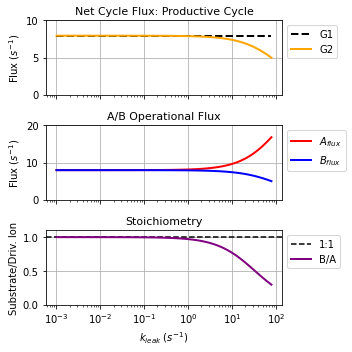

In [21]:
fig, axs = plt.subplots(3, figsize=(5, 5), sharex=True, tight_layout=True)

axs[0].semilogx(leak_array, G1_flux, '--', lw=2, color="black", label="G1")
axs[0].semilogx(leak_array, G2_flux[:, 1], '-', lw=2, color="orange", label="G2")
axs[0].set_title("Net Cycle Flux: Productive Cycle", fontsize=11)
axs[0].set_ylabel(r"Flux ($s^{-1}$)", fontsize=10)
axs[0].set_ylim(0, 10)
axs[0].legend(bbox_to_anchor=(1, 1))
axs[0].grid(True)

axs[1].semilogx(leak_array, A_flux, '-', color='red', lw=2, label=r"$A_{flux}$")
axs[1].semilogx(leak_array, B_flux, '-', color='blue', lw=2, label=r"$B_{flux}$")
axs[1].set_title("A/B Operational Flux", fontsize=11)
axs[1].set_ylabel(r"Flux ($s^{-1}$)", fontsize=10)
axs[1].set_ylim(0, 20)
axs[1].legend(bbox_to_anchor=(1, 1))
axs[1].grid(True)

axs[2].axhline(y=1, ls='--', color='black', label="1:1")
axs[2].semilogx(leak_array, B_flux/A_flux, '-', lw=2, color="purple", label=r"B/A")
axs[2].set_title("Stoichiometry", fontsize=11)
axs[2].set_ylabel("Substrate/Driv. Ion", fontsize=10)
axs[2].set_xlabel(r"$k_{leak}$ ($s^{-1}$)")
axs[2].set_ylim(0, 1.1)
axs[2].legend(bbox_to_anchor=(1, 1))
axs[2].grid(True)
plt.savefig(cwd+"/6wl_all_in_one_plot.png", dpi=300)